Za občino Kranj narisane vse nepremičnine (done) in avtobusne postaje (WIP).

In [1]:
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
from shapely import Point

df = pd.read_csv('data/kvadrati.csv')
df = df[df[['longitude', 'latitude']].notnull().all(1)]

In [2]:
df['naslov_clean'] = df['naslov'].astype(str).str.strip()
df_kranj = df[df['naslov_clean'].str.contains(r'\bkranj\b', case=False, na=False, regex=True)]

# iskanje okoli koordinat občine
center_lon, center_lat = 14.3549353, 46.2432913
df_kranj = df_kranj[
    (df_kranj['longitude'].between(center_lon - 0.25, center_lon + 0.25)) &
    (df_kranj['latitude'].between(center_lat - 0.25, center_lat + 0.25))
]

In [3]:
geometry = [Point(xy) for xy in zip(df_kranj['longitude'], df_kranj['latitude'])]
gdf_kranj = gpd.GeoDataFrame(df_kranj, geometry=geometry, crs="EPSG:4326")

# placeholder za postaje v Kranju
kranj_postaje = {
    'Kranj AP': (46.24744159487505, 14.354741056539368),
    'Kranj ZD': (46.250522547821895, 14.353115591604302),
    'Kranj ŽP': (46.23792963099467, 14.349419114894085),
    'Kranj Stolpnice': (46.23320193141208, 14.363174354374864),
    'Kranj OŠ': (46.23639996291958, 14.360092083753523)
}

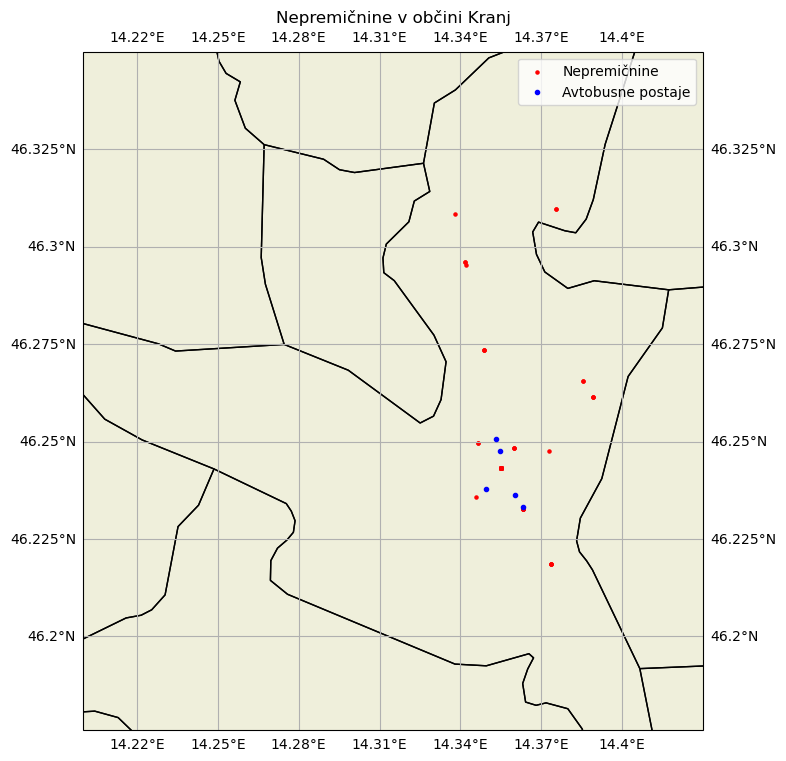

In [4]:
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([14.2, 14.43, 46.176, 46.35])  # limit na Kranj

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES) # občine
ax.gridlines(draw_labels=True)

gdf_kranj.plot(ax=ax, color='red', markersize=5, label='Nepremičnine')

postaje_lons = [lon for lat, lon in kranj_postaje.values()]
postaje_lats = [lat for lat, lon in kranj_postaje.values()]
ax.plot(postaje_lons, postaje_lats, 'bo', markersize=3, label='Avtobusne postaje')

plt.title("Nepremičnine v občini Kranj")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show();